In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.patches import Rectangle

## Data Upload

In [3]:
inc_init=pd.read_csv('incl.csv', encoding='cp1251', sep = ';')
inc_init.rename(columns = {'Скважина':'well','Зенитный угол(град)':'inc','Азимут(град)':'azi','Измеренная глубина(м)':'md','Абсолютная глубина(м)':'tvdss'}, inplace=True)
inc = inc_init[['well', 'md', 'tvdss', 'inc', 'azi']]
inc.head()

,well,md,tvdss,inc,azi
0,1,10.0,NaN,0.18,0.0
1,1,40.0,NaN,0.20,0.0
2,1,80.0,NaN,0.30,0.0
3,1,120.0,NaN,0.33,0.0
4,1,160.0,NaN,0.30,0.0


In [4]:
mer_init = pd.read_csv('mer.csv', encoding='cp1251', sep=';')
mer_init.rename(columns = 
                {'имя скважины':'well',
                 'дата(дд.мм.гггг)':'date',
                 'пласт':'zone',
                 'характер работы':'type',
                 'состояние':'status',
                 'способ эксплуатации':'pump',
                 'время работы':'work_time',
                 'время простоя':'standby_time',
                 'нефть':'oil_t',
                 'вода':'water_t',
                 'закачка':'injection'}, inplace=True)
mer = mer_init[['well', 'date', 'zone', 'type', 'status', 'pump', 'work_time', 'standby_time', 'oil_t', 'water_t', 'injection']]
mer.head()

,well,date,zone,type,status,pump,work_time,standby_time,oil_t,water_t,injection
0,1,01.11.2007,БС9/2,НЕФ,РАБ.,ЭЦН,528,0,1034.0,1713.0,0.0
1,1,01.12.2007,БС9/2,НЕФ,РАБ.,ЭЦН,303,441,382.0,852.0,0.0
2,1,01.01.2008,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,626.0,1725.0,0.0
3,1,01.02.2008,БС9/2,НЕФ,РАБ.,ЭЦН,422,274,233.0,1061.0,0.0
4,1,01.03.2008,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,649.0,1890.0,0.0


In [10]:
mer.well.unique()

array(['1', '1_1', '1006', '1007', '1010', '1031', '1045', '1057', '1130',
       '1132', '1133', '1134', '1135', '1136', '1137Г', '1138', '1139',
       '1140', '1141', '1142', '1143', '1144', '1144_1', '1145', '1146',
       '1147', '1148', '1150', '1151', '1151_1', '1154', '1178', '1179',
       '117P', '1180', '1186', '1187', '1188', '1189', '1190', '1191',
       '1192', '1193', '1194Б', '1195', '1196', '1205Г', '1206', '1207',
       '1209', '1211', '1212', '1213', '1213_1', '1214', '1218', '1225',
       '1227', '1228', '1229', '1232', '1247', '1249', '1252', '1253',
       '1260', '1261', '1264', '1268', '1276', '1277', '1278', '1279БИС',
       '1280', '1298Г', '1300', '1301', '1302', '1303', '1304', '1305',
       '1306', '1307', '1308', '1309', '1309_1', '1310', '1328', '1329',
       '1330', '1333', '1334', '1335', '1336', '1337', '1350', '1351',
       '1352', '1353', '1358', '1359', '1363', '1365', '1367', '1368',
       '1368_1', '1369', '1369_1', '1370', '1379', '1381',

In [5]:
zones_init = pd.read_csv('markers.csv', encoding='cp1251', sep=';')
zones_init.rename(columns = 
                  {'Скважина':'well',
                   ' Маркер':'zone',
                   ' H':'md'}, inplace=True)
zones = zones_init[['well', 'zone', 'md']]
zones['well'].unique()

array(['1', '1006PL', '1007', '1010', '1031PL', '1045', '1057', '1057f',
       '1130', '1132', '1133', '1134', '1135', '1136', '1137PL', '1138',
       '1139', '1140', '1141', '1142', '1143', '1144', '1144_1', '1145',
       '1146', '1147', '1148', '1150PL', '1151PL', '1154', '1178', '1179',
       '117P', '1180', '1186PL', '1187', '1188', '1189PL', '1190', '1191',
       '1192', '1193', '1194Б', '1195', '1196', '1205PL', '1206', '1207',
       '1211', '1212', '1213', '1214', '1218', '1225', '1227', '1228',
       '1229', '1232PL', '1247', '1247f', '1249PL', '1252', '1253',
       '1260', '1261', '1264', '1268', '1276', '1277', '1278', '1279БИС',
       '1280', '1298PL', '1300', '1301', '1302PL', '1303', '1304', '1305',
       '1306', '1307', '1308', '1309', '1310', '1328', '1329', '1333',
       '1334', '1335', '1336', '1337', '1350', '1351', '1352', '1353',
       '1358PL', '1359PL', '1363', '1365', '1367', '1368', '1368_1',
       '1369', '1370', '1379', '1381', '1383', '1384', '13

In [24]:
frac_init = pd.read_csv('welltest_091120221832.csv', encoding='cp1251', sep=';')
frac_init.rename(columns={'NSKV_SRC':'well',
                          'DATE_OP':'date_op',
                          'LAYER':'zone',
                          'NUM_OPER':'num_oper',
                          'PERFORMER':'perform',
                          'MPR_PLAN':'weight_surf',
                          'MPR_LAYER':'weight_layer'}, inplace=True)
frac = frac_init[['well', 'date_op', 'num_oper', 'perform', 'weight_surf', 'weight_layer']]
frac_count = pd.DataFrame(frac.groupby(['well'])['num_oper'].count())
frac_weight = pd.DataFrame(frac.groupby(['well'])['weight_layer'].mean())
# frac_date_op = pd.DataFrame(frac.groupby(['well'])['date_op'])

In [28]:
frac[['well', 'date_op']]

,well,date_op
0,1,16.10.07 00:00:00
1,1,28.10.07 00:00:00
2,1813,29.04.15 00:00:00
3,2030,29.04.15 02:00:00
4,2030,29.04.15 04:00:00
...,...,...
943,476р,04.03.22 00:00:00
944,476р,04.03.22 02:00:00
945,9314,31.10.16 00:00:00
946,9314,31.10.16 02:00:00


In [39]:
def func_lst(*args):
    lst = []
    for x in args:
        lst.append(x)
    return lst
frac_date_op = pd.DataFrame(frac.groupby(['well'])['date_op'].apply(lambda x: func_lst(x)))

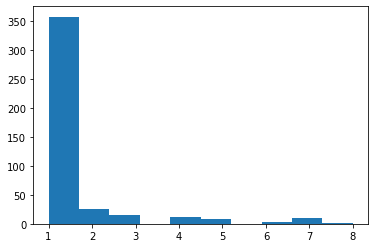

In [55]:
def lenght_lst(x):
    return len(x)
frac_date_op['q_fracs'] = pd.DataFrame(frac.groupby(['well'])['date_op'].apply(lambda x: lenght_lst(x)))
plt.hist(frac_date_op['q_fracs']);

In [91]:
frac_date_op['perform'] = pd.DataFrame(frac.groupby(['well'])['perform'].apply(lambda x: func_lst(x)))

In [103]:
mer

,well,date,zone,type,status,pump,work_time,standby_time,oil_t,water_t,injection
0,1,01.11.2007,БС9/2,НЕФ,РАБ.,ЭЦН,528,0,1034.0,1713.0,0.0
1,1,01.12.2007,БС9/2,НЕФ,РАБ.,ЭЦН,303,441,382.0,852.0,0.0
2,1,01.01.2008,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,626.0,1725.0,0.0
3,1,01.02.2008,БС9/2,НЕФ,РАБ.,ЭЦН,422,274,233.0,1061.0,0.0
4,1,01.03.2008,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,649.0,1890.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
215765,478ПО,01.06.2022,БС9/2,НЕФ,КОНС,ФОН,0,0,0.0,0.0,0.0
215766,478ПО,01.07.2022,БС9/2,НЕФ,КОНС,ФОН,0,0,0.0,0.0,0.0
215767,478ПО,01.08.2022,БС9/2,НЕФ,КОНС,ФОН,0,0,0.0,0.0,0.0
215768,478ПО,01.09.2022,БС9/2,НЕФ,КОНС,ФОН,0,0,0.0,0.0,0.0


In [8]:
frac_final = frac_count.join(frac_weight)
frac_final

,num_oper,weight_layer
well,,
1,2,70.507000
102Р,1,29.500000
1130,1,57.700000
1132,1,60.400000
1134,1,30.350000
...,...,...
430Р,1,73.400000
460Р,1,88.136000
476P,1,59.500000


## Data Processing

In [94]:
inc_hrz = inc[inc['inc'] > 80]
inc_hrz

,well,md,tvdss,inc,azi
439,1_1,2913.82,NaN,81.54,214.76
440,1_1,2923.05,NaN,83.67,214.35
441,1_1,2932.26,NaN,85.35,214.86
442,1_1,2941.48,NaN,87.11,214.89
443,1_1,2950.84,NaN,88.27,214.39
...,...,...,...,...,...
239170,476Р_1,3436.86,NaN,91.23,155.80
239171,476Р_1,3446.24,NaN,91.45,155.62
239172,476Р_1,3455.72,NaN,91.45,155.32
239173,476Р_1,3466.15,NaN,91.56,155.72


In [95]:
azi_mean = pd.DataFrame(inc_hrz.groupby(['well'])['azi'].mean())
azi_std = pd.DataFrame(inc_hrz.groupby(['well'])['azi'].std())
azi_mean.rename(columns={'azi':'azi_mean'}, inplace=True)
azi_std.rename(columns={'azi':'azi_std'}, inplace=True)

In [96]:
inc_hrz_well = inc_hrz['well'].unique()
inc_hrz_well

array(['1_1', '1006', '1031', '1137Г', '1150', '1151', '1151_1', '1186',
       '1189', '1194PL', '1194Г', '1194Г2', '1205Г', '1209', '1209PL',
       '1213_1', '1232', '1232PL', '1249', '1298Г', '1302', '1330',
       '1330PL', '1358', '1359', '1369_1', '1386_1', '1436_1', '1441',
       '1442', '1446Г', '1447_1', '1498Г', '1498Г_1', '1500_1', '1503_1',
       '1505_1', '1524_1', '1525_1', '1526_1', '1526Г', '1541_1', '1543',
       '1545', '1547', '1553_1', '1590_1', '1646_1', '1664_1', '1714',
       '1715', '1716_1', '1717', '1721_1', '1721ST2', '1731_1', '1764_1',
       '1781', '1790_1', '1803_1', '1803Г1', '1824_1', '1826_1', '1831_1',
       '1877_1', '1950_1', '1960_1', '1995Г', '2054', '2083_1', '2121Г',
       '2134', '2134PL', '2151_1', '2176Г', '2200Г', '2201Г', '2203_1',
       '2251Г', '2253Г', '2259_1', '2292Г', '2293_1', '2293Г', '2294Г',
       '2295Г', '2296Г', '2301', '2301_1', '2340Г', '2341Г', '2347',
       '2410', '2412Г', '2412Г2', '2422Г', '2423Г', '2439Г', '2

In [99]:
# mer_hrz = mer[mer['well'].isin(inc_hrz_well)]
# mer_hrz[mer_hrz['well'] == wellSel]

In [100]:
mer_hrz = mer_hrz[mer_hrz['status'] == 'РАБ.']
mer_hrz

,well,date,zone,type,status,pump,work_time,standby_time,oil_t,water_t,injection
180,1_1,01.04.2016,БС9/2,НЕФ,РАБ.,ЭЦН,528,0,494.33,1620.43,0.0
181,1_1,01.05.2016,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,441.65,2298.57,0.0
182,1_1,01.06.2016,БС9/2,НЕФ,РАБ.,ЭЦН,720,0,344.20,2149.38,0.0
183,1_1,01.07.2016,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,315.57,2131.69,0.0
184,1_1,01.08.2016,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,354.85,1963.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...
215513,476P_1,01.06.2022,БС9/2,НЕФ,РАБ.,ЭЦН,716,4,1118.82,254.89,0.0
215514,476P_1,01.07.2022,БС9/2,НЕФ,РАБ.,ЭЦН,735,9,895.85,322.28,0.0
215515,476P_1,01.08.2022,БС9/2,НЕФ,РАБ.,ЭЦН,736,8,660.50,252.97,0.0
215516,476P_1,01.09.2022,БС9/2,НЕФ,РАБ.,ЭЦН,717,3,548.47,329.29,0.0


In [118]:
final = azi_mean.join(azi_std)
final = final.join(oil_cumul)
final = final.join(frac_final)
final

,azi_mean,azi_std,cum_oil_6,num_oper,weight_layer
well,,,,,
1006,354.960000,3.646279,1137.00,NaN,NaN
1031,8.844630,1.686818,14248.00,NaN,NaN
1137Г,283.567347,3.252635,13806.00,1.0,50.527000
1150,163.505224,2.165475,7496.00,6.0,44.766667
1151,0.000000,0.000000,1291.00,7.0,17.878571
...,...,...,...,...,...
407P_1,164.344167,1.356805,1100.00,NaN,NaN
408P_1,302.217419,1.052590,2842.00,NaN,NaN
410P_1,158.213684,0.732424,796.99,NaN,NaN


In [119]:
oil_per_day = final.copy()
oil_per_day['oil_per_day'] = (oil_cumul['cum_oil_6']/work_time_cumul['work_time_6'])*24
oil_per_day['oil_per_day'].fillna(0, inplace=True)
oil_per_day

,azi_mean,azi_std,cum_oil_6,num_oper,weight_layer,oil_per_day
well,,,,,,
1006,354.960000,3.646279,1137.00,NaN,NaN,6.849398
1031,8.844630,1.686818,14248.00,NaN,NaN,87.950617
1137Г,283.567347,3.252635,13806.00,1.0,50.527000,86.287500
1150,163.505224,2.165475,7496.00,6.0,44.766667,50.308725
1151,0.000000,0.000000,1291.00,7.0,17.878571,7.871951
...,...,...,...,...,...,...
407P_1,164.344167,1.356805,1100.00,NaN,NaN,6.586826
408P_1,302.217419,1.052590,2842.00,NaN,NaN,16.368611
410P_1,158.213684,0.732424,796.99,NaN,NaN,4.660760


In [120]:
final = final.join(oil_per_day['oil_per_day'])
final = final.join(azi_180['azi_mean180'])

In [121]:
month_quant = 6
oil_cumul = pd.DataFrame(mer_hrz.groupby(['well'])['oil_t'].apply(lambda x: np.nansum(np.array(x[:month_quant]))))
work_time_cumul = pd.DataFrame(mer_hrz.groupby(['well'])['work_time'].apply(lambda x: np.nansum(np.array(x[:month_quant]))))
oil_cumul.rename(columns={'oil_t':'cum_oil_6'}, inplace=True)
work_time_cumul.rename(columns={'work_time':'work_time_6'}, inplace=True)

In [122]:
azi_180 = final.copy()
azi_180['azi_mean180'] = final['azi_mean'].apply(lambda x: int(x-180) if x>180 else int(x))
azi_180

,azi_mean,azi_std,cum_oil_6,num_oper,weight_layer,oil_per_day,azi_mean180
well,,,,,,,
1006,354.960000,3.646279,1137.00,NaN,NaN,6.849398,174
1031,8.844630,1.686818,14248.00,NaN,NaN,87.950617,8
1137Г,283.567347,3.252635,13806.00,1.0,50.527000,86.287500,103
1150,163.505224,2.165475,7496.00,6.0,44.766667,50.308725,163
1151,0.000000,0.000000,1291.00,7.0,17.878571,7.871951,0
...,...,...,...,...,...,...,...
407P_1,164.344167,1.356805,1100.00,NaN,NaN,6.586826,164
408P_1,302.217419,1.052590,2842.00,NaN,NaN,16.368611,122
410P_1,158.213684,0.732424,796.99,NaN,NaN,4.660760,158


In [123]:
final_frac = final[final['weight_layer'].notna()]

In [124]:
final_frac_cumul = final_frac.copy()
final_frac_cumul['azi_mean180'] = final_frac_cumul['azi_mean'].apply(lambda x: int(x-180) if x>180 else int(x))
# final_frac_test=final_frac_test.join(work_time_cumul)
final_frac_cumul['oil_per_day'] = (oil_cumul['cum_oil_6']/work_time_cumul['work_time_6'])*24
final_frac_cumul['oil_per_day'].fillna(0, inplace=True)
final_frac_cumul['oil_per_day']
final_frac_cumul

,azi_mean,azi_std,cum_oil_6,num_oper,weight_layer,oil_per_day,azi_mean180
well,,,,,,,
1137Г,283.567347,3.252635,13806.00,1.0,50.527000,86.287500,103
1150,163.505224,2.165475,7496.00,6.0,44.766667,50.308725,163
1151,0.000000,0.000000,1291.00,7.0,17.878571,7.871951,0
1151_1,53.445556,0.336787,NaN,2.0,25.000000,0.000000,53
1205Г,178.242105,1.951590,50988.00,1.0,99.089000,289.704545,178
1298Г,16.571389,1.827730,1745.00,1.0,89.800000,12.202797,16
1386_1,324.745556,1.073066,7357.87,3.0,24.800000,47.355559,144
1446Г,264.104688,3.094577,19346.00,1.0,118.820000,119.758576,84
1505_1,166.562500,2.157677,997.46,4.0,26.050000,6.506942,166


In [125]:
max(final['azi_std'])

137.81702359399472

In [126]:
final[final['azi_std'] == max(final['azi_std'])]

,azi_mean,azi_std,cum_oil_6,num_oper,weight_layer,oil_per_day,azi_mean180
well,,,,,,,
2340Г,291.851538,137.817024,16633.0,NaN,NaN,104.610063,111


In [649]:
# inc_hrz[inc_hrz['well'] == '2340Г'] 

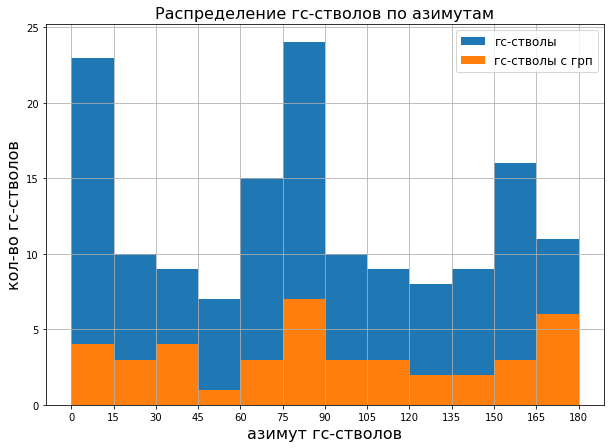

In [128]:
# final_test['azi_mean180']
# final_frac_test['azi_mean180']
fig, ax = plt.subplots(figsize=(10,7))
binsSel = np.arange(0,195,15)
ax.hist(final['azi_mean180'], bins=binsSel, label='гс-стволы')
ax.hist(final_frac_cumul['azi_mean180'], bins=binsSel, label='гс-стволы с грп')
ax.set_xlabel('азимут гс-стволов', fontsize=16)
ax.set_ylabel('кол-во гс-стволов', fontsize=16)
ax.xaxis.set_major_locator(MultipleLocator(base=15))
ax.legend(fontsize=12)
ax.grid()
plt.title('Распределение гс-стволов по азимутам', fontsize=16);

In [129]:
txt_wells = final[(final['cum_oil_6']>30000)]

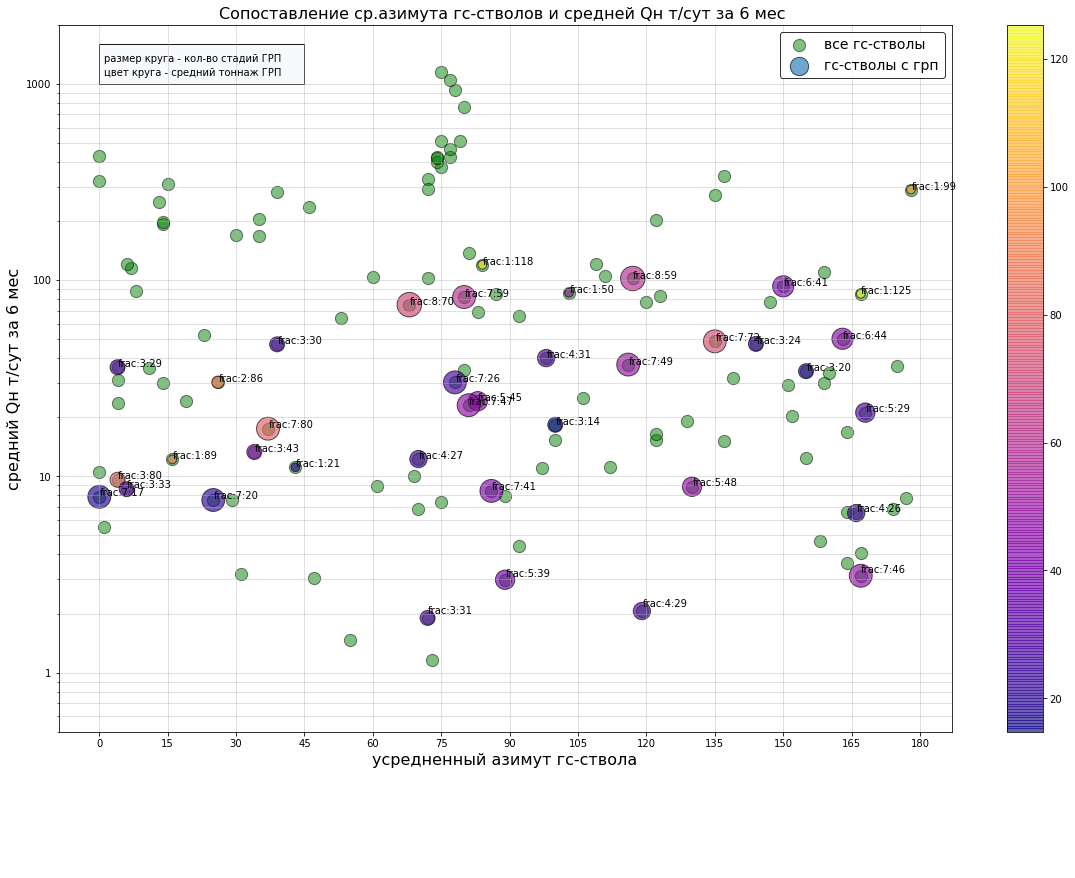

In [130]:
fig, ax = plt.subplots(figsize=(20,13))
x = final['azi_mean180']
y = final['oil_per_day']
x_frac = final_frac_cumul['azi_mean180']
y_frac = final_frac_cumul['oil_per_day']
a = ax.scatter(x, y, s=150, c='g', alpha=0.5, edgecolors="k", label='все гс-стволы')
b = ax.scatter(x_frac, y_frac, s=final_frac['num_oper']*75, c=final_frac['weight_layer'], cmap='plasma', marker='o', alpha=0.65, edgecolors="k", label='гс-стволы с грп')
fig.colorbar(b, ax=ax)
ax.xaxis.set_major_locator(MultipleLocator(base=15))
ax.set_ylim(0.5,2_000)
ax.set_yscale("log")
ax.set_ylabel('средний Qн т/сут за 6 мес', fontsize=16)
ax.set_xlabel('усредненный азимут гс-ствола', fontsize=16)
ax.grid(which='both', alpha=0.5)
ax.legend(fontsize=14, edgecolor="black")
plt.title('Сопоставление ср.азимута гс-стволов и средней Qн т/сут за 6 мес ', fontsize=16)
sf = ScalarFormatter()
sf.set_powerlimits((-5, 5))
ax.yaxis.set_major_formatter(sf)
rect = Rectangle((0, 1000), 45, 600, facecolor='#f7f9fc', alpha=0.9, edgecolor="black", linewidth=1)
ax.add_patch(rect)
ax.annotate('размер круга - кол-во стадий ГРП', xy=(1, 1300), xycoords='data', fontsize=10)
ax.annotate('цвет круга - средний тоннаж ГРП', xy=(1, 1100), xycoords='data', fontsize=10)
for i, txt in enumerate(final_frac_cumul['num_oper']):
    ax.annotate('frac:'+ str(int(txt)) +':'+ str(int(np.array(final_frac_cumul['weight_layer'])[i])), 
                (x_frac[i]+0.1, y_frac[i]+0.1), fontsize = 10)

In [ ]:
plt.savefig('sug_azi_oilprod.pdf')

In [507]:
x_bar=pd.cut(final['azi_mean'], bins=[0,60,120,180,240,300,360], labels=['0-60','60-120','120-180','180-240','240-300','300-360'], include_lowest=True)
final['azi_cat'] = x_bar
final

,azi_mean,azi_std,cum_oil_6,num_oper,weight_layer,azi_cat
well,,,,,,
1006,354.960000,3.646279,1137.00,NaN,NaN,300-360
1031,8.844630,1.686818,14248.00,NaN,NaN,0-60
1137Г,283.567347,3.252635,13806.00,1.0,50.527000,240-300
1150,163.505224,2.165475,7496.00,6.0,44.766667,120-180
1151,0.000000,0.000000,1291.00,7.0,17.878571,0-60
...,...,...,...,...,...,...
407P_1,164.344167,1.356805,1100.00,NaN,NaN,120-180
408P_1,302.217419,1.052590,2842.00,NaN,NaN,300-360
410P_1,158.213684,0.732424,796.99,NaN,NaN,120-180


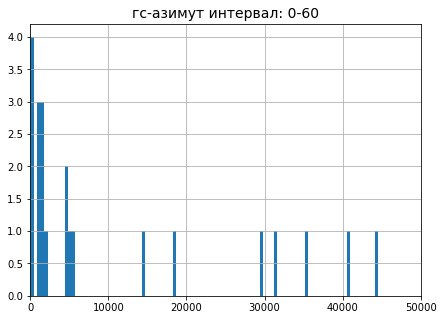

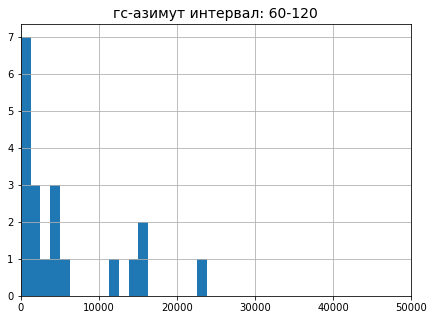

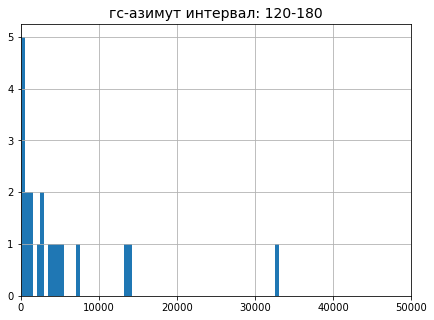

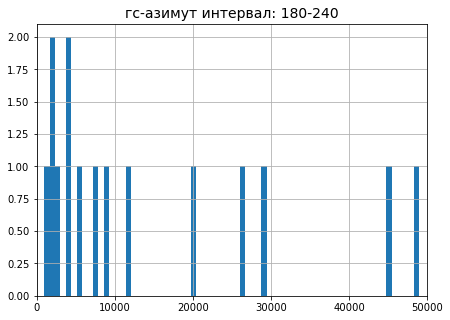

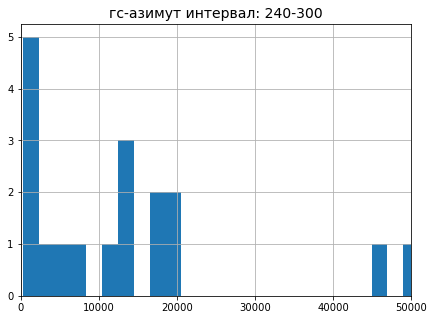

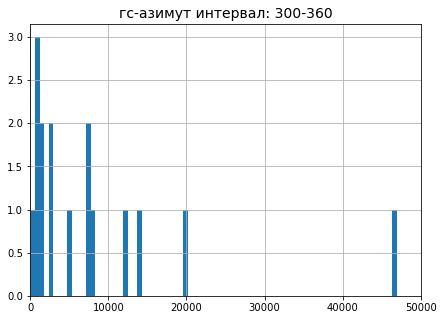

In [665]:
catList=['0-60','60-120','120-180','180-240','240-300','300-360']
for i, interval in enumerate(catList):
    fig,ax=plt.subplots(figsize=(7,5))
    ax.hist(final[final['azi_cat'] == interval]['cum_oil_6'], bins=100)
    ax.grid(which='both')
    ax.set_xlim(0, 50000)
    plt.title('гс-азимут интервал: ' + interval, fontsize=14)
    plt.show()

In [333]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=False, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

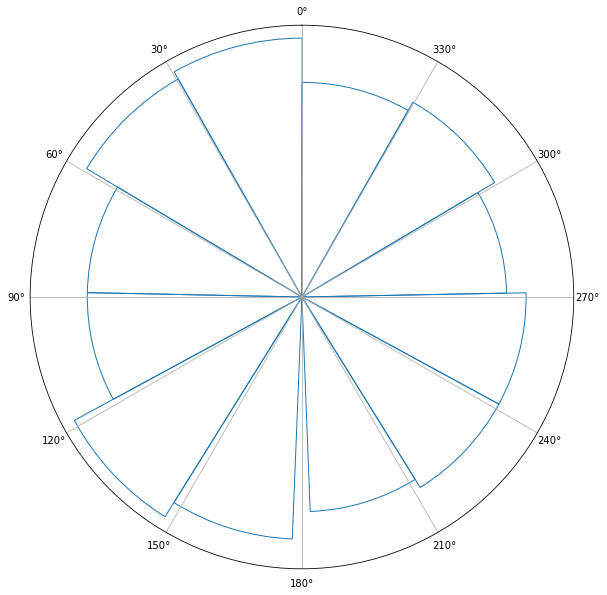

In [462]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(15,10))
# Visualise by area of bins
circular_hist(ax, x, offset=np.pi/2, bins=12, density=True)
ax.set_xticks(np.pi/180 * np.linspace(0,  360, 12, endpoint=False));
# ax[0].set_rgrids((0,1), angle=30)
# Visualise by radius of bins
# circular_hist(ax[1], x, offset=np.pi/2, density=False)